In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CUstomer-Churn-Prediction.csv')

In [3]:
df2 = df.copy()

In [4]:
df3 = df.copy()

In [5]:
df1 = df.copy()

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Churn'>

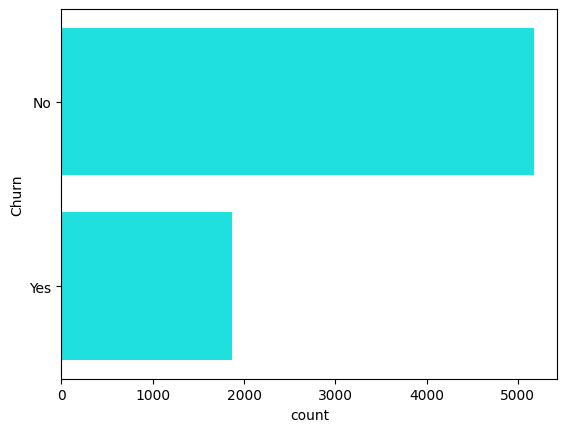

In [10]:
sns.countplot(df['Churn'], color = 'cyan')

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(7043, 21)

## Basic Visualization with Seaborn Library

<Axes: xlabel='count', ylabel='gender'>

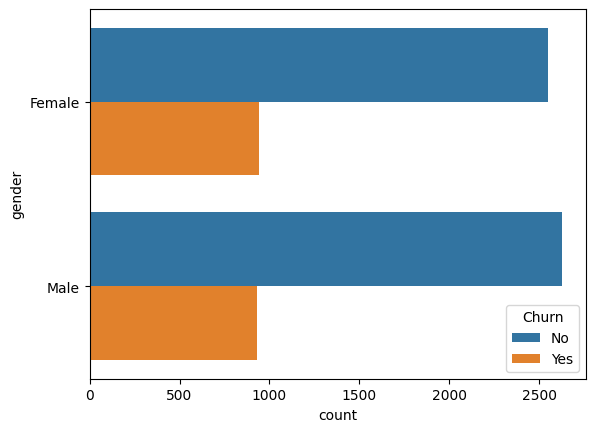

In [13]:
sns.countplot(y = 'gender', hue = 'Churn', data = df)

<Axes: xlabel='count', ylabel='PaymentMethod'>

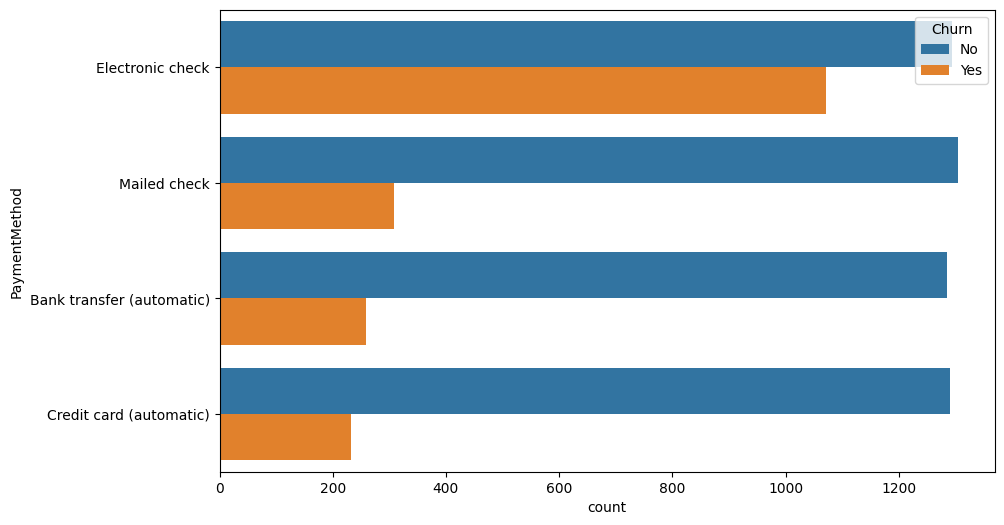

In [14]:
plt.subplots(figsize = (10,6))
sns.countplot(y = 'PaymentMethod', hue = 'Churn', data = df)

## Preprocess the Dataset

In [15]:
df = df.drop('customerID', axis = 1)

In [16]:
df.shape

(7043, 20)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Encode the Data Set

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label = LabelEncoder()

In [20]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


## Separate X, Y 

In [22]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [23]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


 ## Imbalanced Data Handling 

In [24]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [25]:
not_churned = (5174/(5174+1869))*100
churned = (1869/(5174+1869))*100

In [26]:
print('Not Churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not Churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


## Synthetic Minority Oversampling Technique (SMOTETomek)

In [27]:
from imblearn.combine import SMOTETomek

In [28]:
sm = SMOTETomek(random_state = 100)

In [29]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [30]:
X, Y = sm.fit_resample(x, y)

In [31]:
X.shape

(9652, 19)

In [32]:
Y.shape

(9652,)

In [33]:
Y.value_counts()

Churn
0    4826
1    4826
Name: count, dtype: int64

In [34]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
1,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
2,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
3,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104
4,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550


## Near Miss for Under Sampling (not preferable, go for SMT)

In [35]:
from imblearn.under_sampling import NearMiss

In [36]:
NearMiss_obj = NearMiss() 

In [37]:
new_x, new_y = NearMiss_obj.fit_resample(x,y)

In [38]:
new_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.90,1624
1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,5454
2,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
3,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
4,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,5651
3734,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,3448
3735,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,5776
3736,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,5431


In [39]:
new_x.shape

(3738, 19)

In [40]:
new_y.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

## Over Sampling

In [41]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
over = RandomOverSampler(random_state = 100)

In [44]:
x_new, y_new = over.fit_resample(x,y)

In [45]:
x_new.shape

(10348, 19)

In [46]:
y_new.shape

(10348,)

In [47]:
y_new.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [48]:
import xgboost 

In [49]:
from xgboost import XGBClassifier

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size = .75, random_state = 42)

In [52]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3520,0,0,1,0,16,1,0,2,1,1,1,1,1,1,0,0,3,19.60,2728
5262,0,0,0,0,59,1,2,0,2,0,0,2,0,2,1,0,0,68.70,3480
10333,1,0,0,0,32,1,0,1,0,0,0,2,2,2,0,1,2,96.20,2767
4058,0,0,1,1,40,1,2,1,0,0,2,2,0,0,0,1,2,84.85,2870
7089,1,0,0,0,24,1,0,1,0,0,0,2,2,2,0,1,2,96.00,1750


In [53]:
train, test = train_test_split(df, train_size = .80, random_state = 42)

In [54]:
train.to_csv('total_80.csv')

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
clf = DecisionTreeClassifier()

In [57]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [58]:
clf.score(xtest, ytest)

0.8616157711635098

# Without Sampling 

In [59]:
x.shape

(7043, 19)

In [60]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size = 0.75, random_state = 42)

In [61]:
clf.fit(xtrain1, ytrain1)

DecisionTreeClassifier()

In [62]:
clf.score(xtest1, ytest1)

0.7314026121521863

## XGboost Classifier 

In [63]:
xgb = XGBClassifier()

In [64]:
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
xgb.score(xtest, ytest)

0.8488596830305373

# Before Sampling 

In [66]:
xgb.fit(xtrain1, ytrain1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
xgb.score(xtest1, ytest1)

0.7904599659284497

## CROSS VALIDATION 

## K Fold Cross Validation 

In [68]:
from sklearn.model_selection import KFold, cross_val_score

In [69]:
#from sklearn.model_selection import train_test_split

In [70]:
#xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size = 75, random_state = 42)

In [71]:
kfold = KFold(n_splits = 5, shuffle = True)

In [72]:
result = cross_val_score(xgb, x_new, y_new, cv = kfold)